In [1]:
!pip install kaggle
!pip install efficientnet

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d datamunge/sign-language-mnist

sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [8]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [9]:
train.shape

(27455, 785)

In [10]:
labels = train['label'].values

In [11]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<Axes: ylabel='count'>

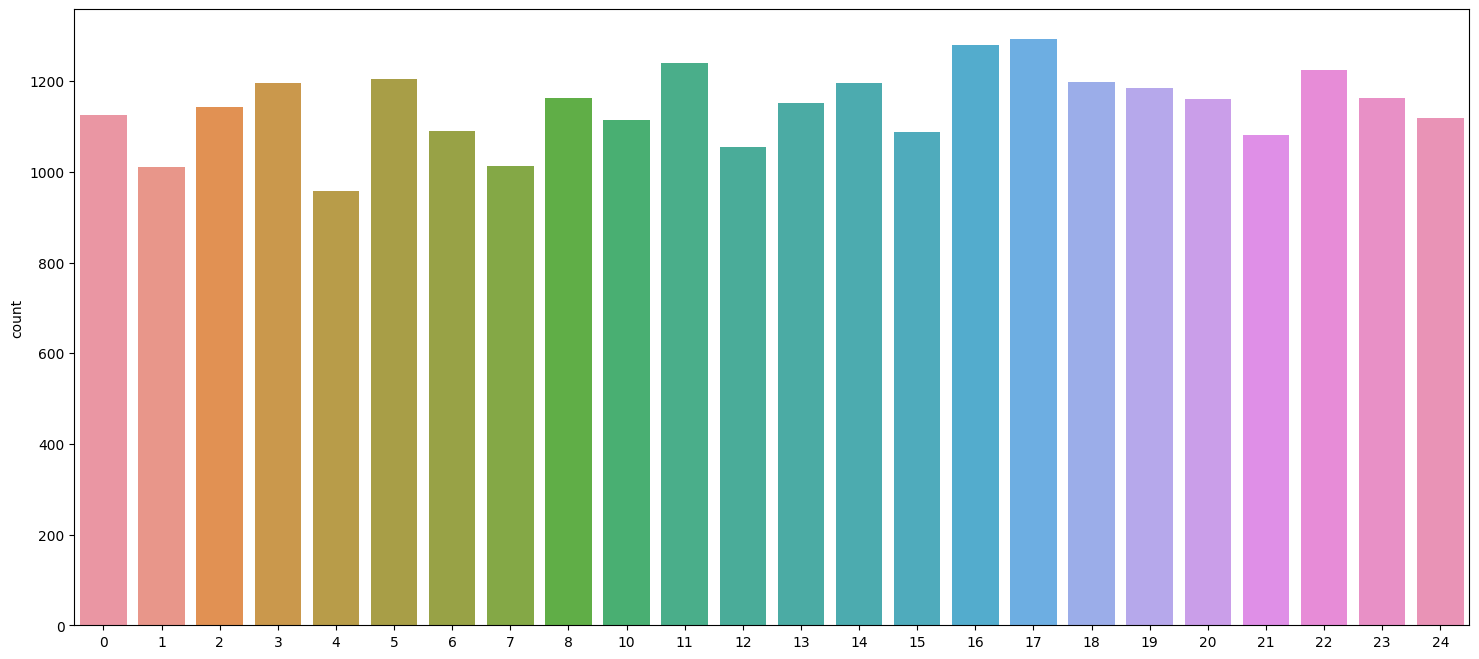

In [12]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [13]:
train.drop('label', axis = 1, inplace = True)

In [14]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [16]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

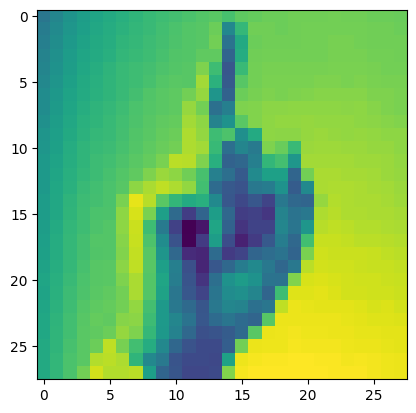

In [17]:
plt.imshow(images[0].reshape(28,28))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [21]:
batch_size = 128
num_classes = 24
epochs = 25

In [22]:
x_train = x_train / 255
x_test = x_test / 255

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [24]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

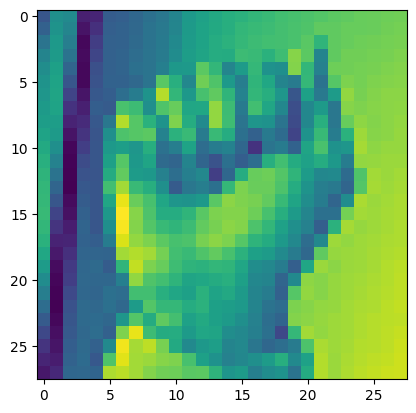

In [25]:
plt.imshow(x_train[0].reshape(28,28))

In [26]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [27]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
151/151 [==============================] - 7s 11ms/step - loss: 2.6267 - accuracy: 0.2013 - val_loss: 1.5785 - val_accuracy: 0.5270
Epoch 2/25
151/151 [==============================] - 1s 7ms/step - loss: 1.2667 - accuracy: 0.5723 - val_loss: 0.8529 - val_accuracy: 0.7251
Epoch 3/25
151/151 [==============================] - 1s 8ms/step - loss: 0.7441 - accuracy: 0.7423 - val_loss: 0.5371 - val_accuracy: 0.8328
Epoch 4/25
151/151 [==============================] - 1s 7ms/step - loss: 0.4822 - accuracy: 0.8346 - val_loss: 0.2993 - val_accuracy: 0.9040
Epoch 5/25
151/151 [==============================] - 1s 8ms/step - loss: 0.3192 - accuracy: 0.8918 - val_loss: 0.1914 - val_accuracy: 0.9493
Epoch 6/25
151/151 [==============================] - 1s 7ms/step - loss: 0.2168 - accuracy: 0.9280 - val_loss: 0.1127 - val_accuracy: 0.9723
Epoch 7/25
151/151 [==============================] - 1s 8ms/step - loss: 0.1480 - accuracy: 0.9529 - val_loss: 0.0764 - val_accuracy: 0.9828
Epoch

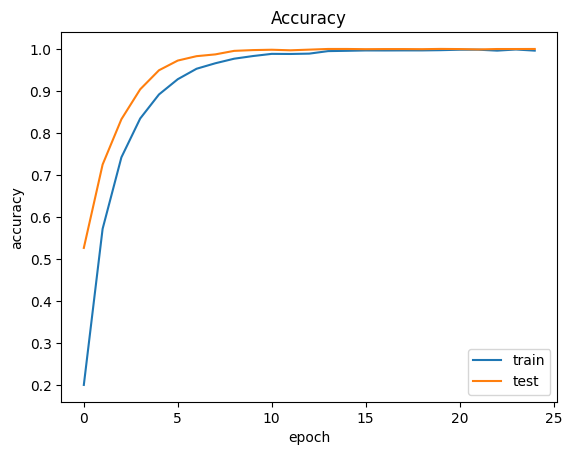

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [30]:
test_labels = test['label']

In [31]:
test.drop('label', axis = 1, inplace = True)

In [32]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [33]:
test_labels = label_binrizer.fit_transform(test_labels)

In [34]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [35]:
test_images.shape

(7172, 28, 28, 1)

In [36]:
y_pred = model.predict(test_images)

225/225 [==============================] - 1s 2ms/step


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(test_labels, y_pred.round())

0.8789737869492471